# Correlation Scatter Plot
### Aim:
Plot a scatter plot of the strongest negative and positive pairwise correlation in the DepMap dataset

### Output:
Scatter plot of strongest negative and positive pairwise correlations

In [1]:
# Import packages and DepMap tools
from DepMapTools.DataImport import SaveLoad, DataDownload
import os
import pandas as pd
from DepMapTools.Correlations import GeneCorrelations
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Instantiate DataDownload, SaveLoad and GeneCorrelations classes
dd = DataDownload(foldername='AnalysisData', filename='CRISPR_gene_effect_clean')
sl = SaveLoad()
gc = GeneCorrelations()

In [3]:
# Load clean Achilles CRISPR data
PRD = ".."
csv_path = os.path.join(PRD,
                        'AnalysisData')
df = dd.load_data('CRISPR_gene_effect_clean.csv', 0, csv_path)

In [4]:
# Define directory to save generated figures
dir_name = 'Figures'
data_path = os.path.join(PRD, dir_name)
os.makedirs(data_path,
            exist_ok=True)

In [5]:
# Load single gene analysis dictionary
pickle_path = os.path.join(PRD,
                           '1_SingleGene_Analysis/pickle_files/chronos_singlegene_funk.pickle')
funk = sl.load_dict_pickle(pickle_path)

In [6]:
# Create a dictionary of the top correlated genes with each gene of interest
corr_dict = {}
for gene in funk:
    result = {}
    corr = funk[gene]['Correlation']
    top_corr_p = corr[f'{gene}_Pearson_R'].iloc[1]
    top_corr_s = corr[f'{gene}_Spearman_R'].iloc[1]
    result['Pearson'] = top_corr_p
    result['Spearman'] = top_corr_s
    corr_dict[gene] = result

In [7]:
# Turn dictionary into a pandas DF and display
corr_df = pd.DataFrame.from_dict(corr_dict, orient='index', columns=['Pearson', 'Spearman'])

In [8]:
# Make a DF of MDM2 and TP533
df_MDM2 = df[['MDM2', 'TP53']].copy()

In [9]:
# Calculate pearson correlation coefficient between MDM2 and TP533
r, p = stats.pearsonr(df_MDM2['MDM2'], df_MDM2['TP53'])
print(f'Pearson Correlation Coefficent: {r}')

Pearson Correlation Coefficent: -0.7536991052538901


Saving figure MDM2 Scatter Plot


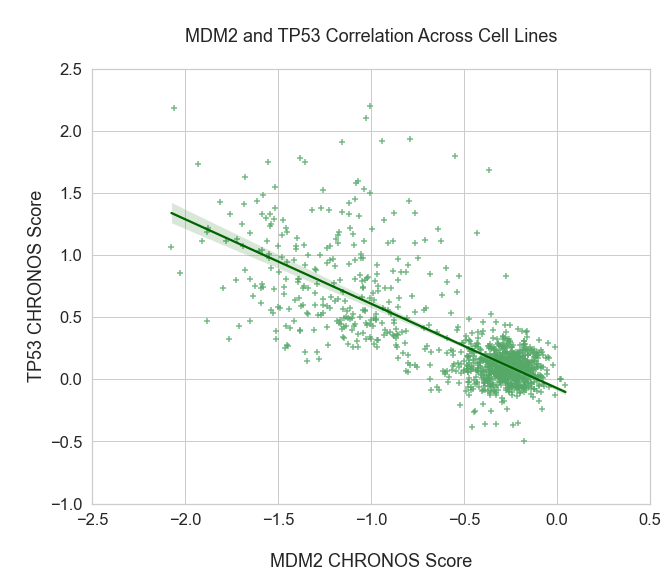

In [14]:
# Plot a scatterplot of the results
sns.set(rc={'figure.figsize':(10,8)}, style='whitegrid', font_scale=1.5)
ax = sns.regplot(x="MDM2", y="TP53", data=df_MDM2, color='g', marker='+', line_kws={'color': '#006400'})
ax.set_xlim(-2.5, 0.5)
ax.set_ylim(-1.0, 2.5)
ax.set_title('\nMDM2 and TP53 Correlation Across Cell Lines\n')
ax.set(xlabel='\nMDM2 CHRONOS Score', ylabel='\nTP53 CHRONOS Score')
sl.save_fig('MDM2 Scatter Plot')
plt.show()

In [11]:
# Make a DF of just MDM2 and TP533 data
df_TSC = df[['TSC1', 'TSC2']].copy()

In [12]:
# Calculate pearson correlation coefficient between MDM2 and TP533
r, p = stats.pearsonr(df_TSC['TSC1'], df_TSC['TSC2'])
print(f'Pearson Correlation Coefficent: {r}')

Pearson Correlation Coefficent: 0.8953643787264098


Saving figure TSC1 Scatter Plot


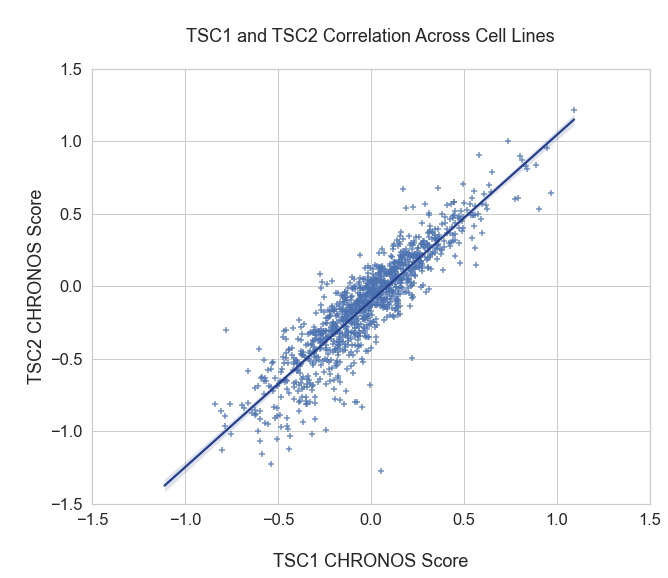

In [13]:
# Plot a scatterplot of the results
sns.set(rc={'figure.figsize':(10,8)}, style='whitegrid', font_scale=1.5)
ax = sns.regplot(x="TSC1", y="TSC2", data=df_TSC, color='b', marker='+', line_kws={'color': '#27408B'})
ax.set_xlim(-1.5,1.5)
ax.set_ylim(-1.5,1.5)
ax.set_title('\nTSC1 and TSC2 Correlation Across Cell Lines\n')
ax.set(xlabel='\nTSC1 CHRONOS Score', ylabel='\nTSC2 CHRONOS Score')
sl.save_fig('TSC1 Scatter Plot')
plt.show()